In [2]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

%matplotlib widget


In [3]:
df = pd.read_csv("D:\TY S2\mini_project\Crop-Yield-Prediction-in-India-using-ML-main\Crop_recommendation.csv")

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
# Lets check the shape
df.shape

(2200, 8)

In [6]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
# Check for missing value
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [10]:
# Summary for all Crops.
print("   Average Ratio of Nitrogen in the Soil : {0:.2f}".format(df.N.mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(df.P.mean()))
print("  Average Ratio of Potassium in the Soil : {0:.2f}".format(df.K.mean()))
print("          Average Temperature in Celsius : {0:.2f}".format(df.temperature.mean()))
print("               Average Relative Humidity : {0:.2f}".format(df['humidity'].mean()))
print("            Average PH Value of the Soil : {0:.2f}".format(df['ph'].mean()))
print("                  Average Rainfall in mm : {0:.2f}".format(df['rainfall'].mean()))

   Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
  Average Ratio of Potassium in the Soil : 48.15
          Average Temperature in Celsius : 25.62
               Average Relative Humidity : 71.48
            Average PH Value of the Soil : 6.47
                  Average Rainfall in mm : 103.46


In [11]:
# Summary Statistics for each of the Crops 

@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    
    print("-"*30)
    print("STatistics for Nitrogen")
    print("Minimum Nitrogen required : ", x['N'].min())
    print("Average Nitrogen required : ", x['N'].mean())
    print("Maxiumm Nitrogen required : ", x['N'].max())
    
    print("-"*30)
    print("STatistics for Phosphorous")
    print("Minimum Phosphorous required : ", x['P'].min())
    print("Average Phosphorous required : ", x['P'].mean())
    print("Maxiumm Phosphorous required : ", x['P'].max())
    
    print("-"*30)
    print("STatistics for Potassium")
    print("Minimum Potassium required : ", x['K'].min())
    print("Average Potassium required : ", x['K'].mean())
    print("Maxiumm Potassium required : ", x['K'].max())
    
    print("-"*30)
    print('Similar for other features')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [10]:
def summary(crops):
    x = df[df['label'] == crops]
    
    print("-"*30)
    print("STatistics for Nitrogen")
    print("Minimum Nitrogen required : ", x['N'].min())
    print("Average Nitrogen required : ", x['N'].mean())
    print("Maxiumm Nitrogen required : ", x['N'].max())
    
    print("-"*30)
    print("STatistics for Phosphorous")
    print("Minimum Phosphorous required : ", x['P'].min())
    print("Average Phosphorous required : ", x['P'].mean())
    print("Maxiumm Phosphorous required : ", x['P'].max())
    
    print("-"*30)
    print("STatistics for Potassium")
    print("Minimum Potassium required : ", x['K'].min())
    print("Average Potassium required : ", x['K'].mean())
    print("Maxiumm Potassium required : ", x['K'].max())
    
    print("-"*30)
    print('Similar for other features')
    
interact(summary, crops = list(df['label'].value_counts().index) ); 

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [12]:
# Compare the Average Requirement fr each crops with average condition

all_features = list(df.columns.values)
# all_features = list(df.columns.values.tolist())
# type(all_features)

@interact
def compare(conditions = all_features):
    print("Average Value for ", conditions, "is {0:.2f}".format(df[conditions].mean()))
    print('-'*40)
    print("Rice  : {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("watermelon : {0:.2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print("Mango : {0:.2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
    print('Similar for other Crops....')

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [13]:
# Lets make this function more Intuitive

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature','ph', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print('*'*40)
    print("Crops which require less than avergae", conditions, '\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'rainfal…

C:\Users\siddh\AppData\Local\Temp\ipykernel_8428\2539424470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'], color = 'darkblue')
C:\Users\siddh\AppData\Local\Temp\ipykernel_8428\2539424470.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P'], color = 'darkblue')
C:\Users\siddh

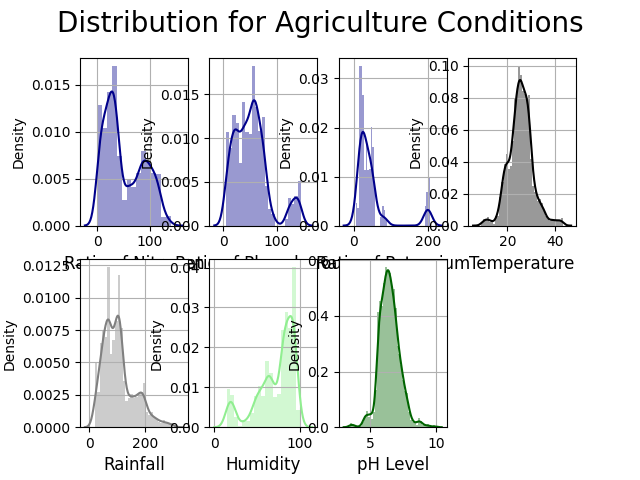

In [14]:
plt.subplot(2,4,1)
sns.distplot(df['N'], color = 'darkblue')
plt.xlabel("Ratio of Nitrogen", fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'], color = 'darkblue')
plt.xlabel("Ratio of Phosphorous", fontsize = 12)
plt.grid()


plt.subplot(2,4,3)
sns.distplot(df['K'], color = 'darkblue')
plt.xlabel("Ratio of Potassium", fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'], color = 'black')
plt.xlabel("Temperature", fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['rainfall'], color = 'grey')
plt.xlabel("Rainfall", fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'], color = 'lightgreen')
plt.xlabel("Humidity", fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ph'], color = 'darkgreen')
plt.xlabel("pH Level", fontsize = 12)
plt.grid()

plt.suptitle("Distribution for Agriculture Conditions", fontsize = 20)
plt.show()

In [15]:
## Lets find out some interesting facts

print("Crops which requires very high ratio of Nitrogen content in Soil : ", df[df['N'] > 120]['label'].unique())
print("Crops which requires very high ratio of Phosphorous content in Soil : ", df[df['P'] > 100]['label'].unique())
print("Crops which requires very high ratio of Potassium content in Soil : ", df[df['K'] > 200]['label'].unique())
print("                          Crops which requires very high Rainfall : ", df[df['rainfall'] > 200]['label'].unique())
print("                          Crops which requires very low temperature : ", df[df['temperature'] < 10]['label'].unique())
print("                          Crops which requires very high temperature : ", df[df['temperature'] > 40]['label'].unique())
print("                          Crops which requires very low humidity : ", df[df['humidity'] < 20]['label'].unique())
print("                          Crops which requires very low ph : ", df[df['ph'] < 4]['label'].unique())
print("                          Crops which requires very high ph : ", df[df['ph'] > 9]['label'].unique())

Crops which requires very high ratio of Nitrogen content in Soil :  ['cotton']
Crops which requires very high ratio of Phosphorous content in Soil :  ['grapes' 'apple']
Crops which requires very high ratio of Potassium content in Soil :  ['grapes' 'apple']
                          Crops which requires very high Rainfall :  ['rice' 'papaya' 'coconut']
                          Crops which requires very low temperature :  ['grapes']
                          Crops which requires very high temperature :  ['grapes' 'papaya']
                          Crops which requires very low humidity :  ['chickpea' 'kidneybeans']
                          Crops which requires very low ph :  ['mothbeans']
                          Crops which requires very high ph :  ['mothbeans']


In [16]:
# Lets understand which crops can only be grown in SUmmer season; winter season; rainy season

print("Summer Crops -->")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50 )]['label'].unique())
print('*'*50)

print("Winter Crops -->")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30 )]['label'].unique())
print('*'*50)

print("Rainy Crops -->")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30 )]['label'].unique())
print('*'*50)

Summer Crops -->
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
**************************************************
Winter Crops -->
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
**************************************************
Rainy Crops -->
['rice' 'papaya' 'coconut']
**************************************************


In [17]:
from sklearn.cluster import KMeans

In [18]:
# Removing the label column
X = df.drop(['label'], axis = 1)

In [19]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [20]:
# Selecting all the values.. output will be of ndarray.
X = X.values

In [21]:
X[:2]

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        ,  21.77046169,
         80.31964408,   7.03809636, 226.6555374 ]])

In [22]:
# Lets determine the optimum number of Clusters within the DataSet.

plt.rcParams['figure.figsize'] = (10,4)

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    print("Iteration ", i, " Done.")

Iteration  1  Done.
Iteration  2  Done.
Iteration  3  Done.
Iteration  4  Done.
Iteration  5  Done.
Iteration  6  Done.
Iteration  7  Done.
Iteration  8  Done.
Iteration  9  Done.
Iteration  10  Done.


In [23]:
print(wcss)

[18820170.46364589, 12070916.353533508, 7423970.865410898, 5337358.560746386, 4417511.1167682065, 3748642.3531599212, 3103936.6816232046, 2727858.0937568443, 2374253.742476347, 2130935.1622811914]


C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


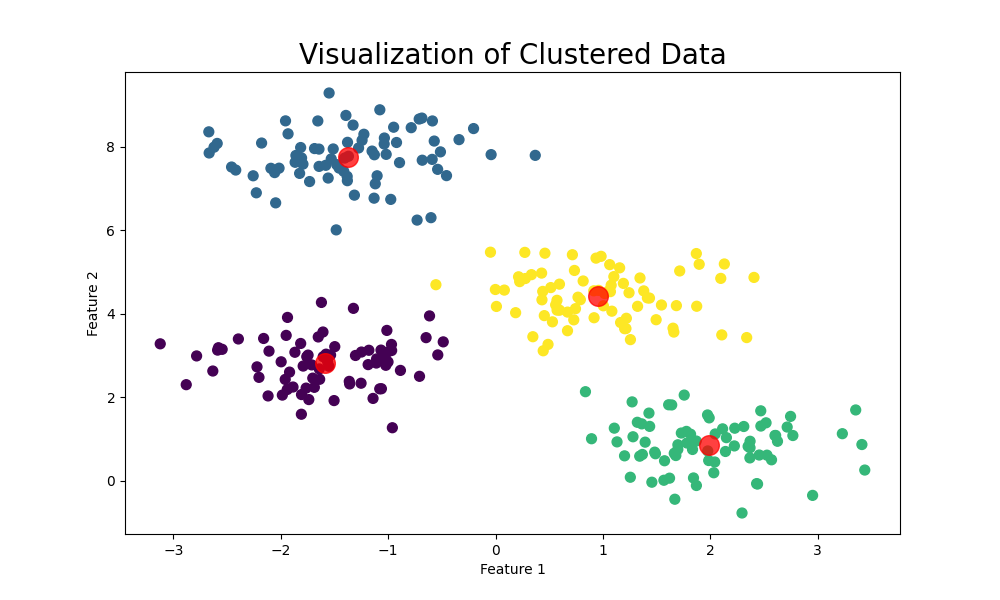

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # mark the centroids
plt.title("Visualization of Clustered Data", fontsize=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .2, random_state = 0)

NameError: name 'y' is not defined